# MaD - Macromolecular Descriptors

This notebook contains all the necessary information to run MaD. If you want to try it fast, just check the code within the minimal examples. You'll find the solutions in the "individual_solutions" and "assembly_models" subfolders within the folder created for your assembly, which is in the main "results" folder.

Explanations of the basic output is explained in section 1A.

For the main parameters that has been tweaked at some point for predictions and why, check section 2 C, D E and F. One assembly in the simulated dataset has a different value for one parameter as well.

All examples apart from the 5 mentioned use default parameters. Meaning, MaD is as plug-and-play as it gets.

1. **Minimal examples**
    1. Homomultimer: VAT complex (7 Å) + output explanation
    1. Heteromultimers: NMDA receptor (6 Å)
1. **Other examples and tweaking parameters**
    1. RAG complex (5 Å)
    1. Actin:tropomyosin (8 Å)
    1. Microtubule and kinesin (9 Å) (tweak)
    1. MecA-ClpC complex (10 Å) (tweak)
    1. Kainate receptor GluK2 (11.6 Å) (tweak)
    1. Beta-galactosidase (13 Å) (tweak)
    1. Simulated assemblies (10 Å)
1. **Ensemble docking with GroEL**
1. **Anchor files**

The testing data may be found on our website: https://www.epfl.ch/labs/lbm/resources/
Note that you may need to adjust the path to structure files depending on how you downloaded/arranged the software and the testing data. 

## 1. Minimal examples

### A. Homomultimer: VAT complex

This minimal code predicts the assembly of the VAT complex, with an experimental map at a resolution of 7 A. A single monomer is considered and the assembly is predicted despite conformational differences between protomers between 1 and 3.5 A of RMSD-Ca, and missing densities in the experimental map.

For homomultimeric assemblies or repeted components in general, only a single copy of the repeated structure is required.

Results are saved in the "results" folder. The name of the results folder is built from the filename of the map and those of the components, along with the resolution, number of copies for each component, and isovalue. New attempts on the same system will create folders with an incremented path, e.g. "..._1", "..._2", and so on. 

* Individual component solutions are stored in the "individual_solutions" subfolder.
* Assembly models, if generated, are stored in the "assembly_models" subfolder. 
* To look at the files used for docking, a copy is available in the "initial_files" folder for better reproducibility.
* For explanations about the "anchor_files" folder within individual_solutions, please see section 4 "anchor files"

In general, descriptors will be stored in the "dsc_db" folder. Restarting this example will be faster, as all descriptors have been computed and will only be loaded.



In [1]:
from mad import MaD

# Make instance
mad = MaD.MaD()

# Add map (specify resolution after path), then add components 
mad.add_map("experimental_data/5g4f/emd_3436_processed.mrc", 7)

# Add component and specify number of copies (VAT complex is hexameric)
mad.add_subunit("experimental_data/5g4f/5g4f_subunit.pdb", n_copies=6)

# Get solutions
mad.run()

# Build assembly
mad.build_assembly()

MaD> Added: density map emd_3436_processed, resolution 7.00 A
MaD> Added: subunit experimental_data/5g4f/5g4f_subunit.pdb
MaD> Created output folder: results/emd_3436_processed_5g4f_subunitx6_res7.000_iso0.000

MaD> Processing map emd_3436_processed
MaD> Building map space for emd_3436_processed_mad...
MaD> Finding anchors in emd_3436_processed_mad... 
MaD> Orienting 1741 anchors...
MaD> Generating descriptors from 9883 oriented anchors...

MaD> Processing subunit 5g4f_subunit
MaD> Building map space for 5g4f_subunit...
MaD> Finding anchors in 5g4f_subunit... 
MaD> Orienting 380 anchors...
MaD> Generating descriptors from 1641 oriented anchors...
MaD> Matching descriptors (emd_3436_processed vs. 5g4f_subunit) (cc = 0.60)...
MaD> Filtering descriptor pairs (map emd_3436_processed vs. structure 5g4f_subunit) (weight=4, n_samples=60*6)...
MaD> Refining emd_3436_processed in 5g4f_subunit...

------------------------------------------
|  # | Repeat | Weight |   mCC  |  RWmCC |
-------------

#### Explanation of output

1. Descriptors are generated for all structures (anchor detection, orientation, and description). If they're available in the database (dsc_db folder), descriptors are loaded instead.
1. Matching occurs:
    1. Local descriptor matching: identifies pair that may yield a valid transformation of the subunit into the density.
    1. Filtering: ranking according to global anchor matching, then clustering. One solution per cluster is kept.
    1. Local rigid refinement to fix inaccuracies from anchor coordinates and orientation.
1. Scoring includes:
    1. Repeat: the repeatability, or percentage of anchors that have a correspondence in the target density.
    1. Weight: the size of the corresponding cluster. The cluster includes the descriptor pairs that agree with that particular localization within the target cryo-EM map.
    1. mCC: map cross-correlation.
    1. RWmCC: the product of the previous scores. It considers structural similarity at all 3 levels considered in our procedure.
1. Assembly building is simply a combinatorial exploration of the different assemblies respecting the target assembly's stoichiometry.
    1. Pairwise overlap (i.e. structural clashes estimated from non-zero voxel values at same point in space) are computed. The table is shown. Columns are not labelled for visualization purposes but are in the same order as the rows, each one corresponding to a solution in the individual_solutions subfolder. In the case of a heteromultimeric assembly, another folder called "subcomplexes" will be created. It will contain either a copy of the component solutions if a single copy is expected, otherwise it will contain subcomplexes of that component alone at the expected stoichiometry (as defined by the n_copies parameter, see section 2A for an example).
    1. Relevant values are summed depending on the combination of solutions. 
1. Output models are ranked in order of increasing overlap (either sum, standard deviations, or maximum value). 
    1. For each model, the cross-correlation (CC) with the target cryo-EM map is reported. The overlap sum, standard deviation and maximum are reported as well. The composition column refers to the individual component solutions that have been combined for the model. Each number corresponds to the index of that solution both in the overlap table and in the individual_solutions folder (or subcomplexes folder if the assembly is heteromultimeric).

### A. Heteromultimer: NMDA receptor

This starts an example on the NMDA receptor, with an experimental map at a resolution of 6 A. All 5 components are added separately. 

Results are saved in the "results" folder. The name of the results folder is built from the filename of the map and those of the components, along with the resolution, number of copies for each component, and isovalue. New attempts on the same system will create folders with an incremented path, e.g. "..._1", "..._2", and so on. 

* Individual component solutions are stored in the "individual_solutions" subfolder.
* The **"subcomplexes" folder contain the final components used to build heteromultimeric assemblies**. It contains either a copy of the individual solutions if the component is not repeated in the assembly, otherwise, it will contain subcomplexes of that component containing the requested number of copies. This is skipped in the case of homomultimeric assemblies, which was the case in the previous example.
* Assembly models, if generated, are stored in the "assembly_models" subfolder. The "composition" will refer to the files in the subcomplexes folder.
* To look at the files used for docking, a copy is available in the "initial_files" folder for better reproducibility.
* For explanations about the "anchor_files" folder within individual_solutions, please see section 4 "anchor files"

In general, descriptors will be stored in the "dsc_db" folder. Restarting this example will be faster, as all descriptors have been computed and will only be loaded.

##### Notes about output models in this case
4 models are generated. The first one is the expected model. The second one has two subunits swapped; they correspond to the two GluN1 subunits, which may be swapped despite a slight conformational difference between them. The third shows an inverted position of the Fab domain. This assembly has a lower score than the first two, and the scores of the individual solutions of the Fab clearly clear out any uncertainty (424 vs 6). The fourth model has the swapped GluN1 subunits and the inverted Fab domains.

In [2]:
from mad import MaD

# Make instance
mad = MaD.MaD()

# Add map (specify resolution after path), then add components 
mad.add_map("experimental_data/5up2/emd_8581_processed.mrc", 6)
mad.add_subunit("experimental_data/5up2/5up2_subA.pdb")
mad.add_subunit("experimental_data/5up2/5up2_subB.pdb")
mad.add_subunit("experimental_data/5up2/5up2_subC.pdb")
mad.add_subunit("experimental_data/5up2/5up2_subD.pdb")
mad.add_subunit("experimental_data/5up2/5up2_Fab.pdb")

# Get solutions per component
mad.run()

# Build assembly
mad.build_assembly()

MaD> Added: density map emd_8581_processed, resolution 6.00 A
MaD> Added: subunit experimental_data/5up2/5up2_subA.pdb
MaD> Added: subunit experimental_data/5up2/5up2_subB.pdb
MaD> Added: subunit experimental_data/5up2/5up2_subC.pdb
MaD> Added: subunit experimental_data/5up2/5up2_subD.pdb
MaD> Added: subunit experimental_data/5up2/5up2_Fab.pdb
MaD> Created output folder: results/emd_8581_processed_5up2_Fabx1.5up2_subAx1.5up2_subBx1.5up2_subCx1.5up2_subDx1_res6.000_iso0.000

MaD> Processing map emd_8581_processed
MaD> Building map space for emd_8581_processed_mad...
MaD> Finding anchors in emd_8581_processed_mad... 
MaD> Orienting 1561 anchors...
MaD> Generating descriptors from 7555 oriented anchors...

MaD> Processing subunit 5up2_subA
MaD> Building map space for 5up2_subA...
MaD> Finding anchors in 5up2_subA... 
MaD> Orienting 332 anchors...
MaD> Generating descriptors from 1652 oriented anchors...

MaD> Processing subunit 5up2_subB
MaD> Building map space for 5up2_subB...
MaD> Findi

## 2. Other examples and tweaking parameters

#### RAG complex at 5 A

Do not forget to create a new MaD instance to avoid issues with previously added structures.

In this case, subB is present in 2 copies. When building the assembly, a subcomplex will be made from its solutions alone before considering the resulting sub-assemblies for final building. This is to minimize the combinatorial cost. Subcomplexes are found in the "subcomplexes" subfolder.

**Pay attention when looking at the composition of the final model: the index shown refers to subcomplexes for the repeated components.** SubB, for example, has been merged into a subcomplex.

Subunits A and C are mostly similar, except for a major difference in their Zinc-finger domain's orientation. Both localizations are found from either, but model building highlights the best model through structural clashes.

In [3]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("experimental_data/6dbl/emd_7845_processed.mrc", 5)
mad.add_subunit("experimental_data/6dbl/6dbl_subA.pdb", 1)
mad.add_subunit("experimental_data/6dbl/6dbl_subB.pdb", 2)
mad.add_subunit("experimental_data/6dbl/6dbl_subC.pdb", 1)

mad.run()
mad.build_assembly()


MaD> Added: density map emd_7845_processed, resolution 5.00 A
MaD> Added: subunit experimental_data/6dbl/6dbl_subA.pdb
MaD> Added: subunit experimental_data/6dbl/6dbl_subB.pdb
MaD> Added: subunit experimental_data/6dbl/6dbl_subC.pdb
MaD> Created output folder: results/emd_7845_processed_6dbl_subAx1.6dbl_subBx2.6dbl_subCx1_res5.000_iso0.000

MaD> Processing map emd_7845_processed
MaD> Building map space for emd_7845_processed_mad...
MaD> Finding anchors in emd_7845_processed_mad... 
MaD> Orienting 1737 anchors...
MaD> Generating descriptors from 9409 oriented anchors...

MaD> Processing subunit 6dbl_subA
MaD> Building map space for 6dbl_subA...
MaD> Finding anchors in 6dbl_subA... 
MaD> Orienting 763 anchors...
MaD> Generating descriptors from 3837 oriented anchors...

MaD> Processing subunit 6dbl_subB
MaD> Building map space for 6dbl_subB...
MaD> Finding anchors in 6dbl_subB... 
MaD> Orienting 427 anchors...
MaD> Generating descriptors from 2246 oriented anchors...

MaD> Processing sub

#### Actin:tropomyosin at 8 A

Do not forget to create a new MaD instance to avoid issues with previously added structures.

In [4]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("experimental_data/3j4k/emd_5751_processed.mrc", 8)
mad.add_subunit("experimental_data/3j4k/3j4k_subunit.pdb", 5)
mad.run()
mad.build_assembly()

MaD> Added: density map emd_5751_processed, resolution 8.00 A
MaD> Added: subunit experimental_data/3j4k/3j4k_subunit.pdb
MaD> Created output folder: results/emd_5751_processed_3j4k_subunitx5_res8.000_iso0.000

MaD> Processing map emd_5751_processed
MaD> Building map space for emd_5751_processed_mad...
MaD> Finding anchors in emd_5751_processed_mad... 
MaD> Orienting 730 anchors...
MaD> Generating descriptors from 3328 oriented anchors...

MaD> Processing subunit 3j4k_subunit
MaD> Building map space for 3j4k_subunit...
MaD> Finding anchors in 3j4k_subunit... 
MaD> Orienting 157 anchors...
MaD> Generating descriptors from 758 oriented anchors...
MaD> Matching descriptors (emd_5751_processed vs. 3j4k_subunit) (cc = 0.60)...
MaD> Filtering descriptor pairs (map emd_5751_processed vs. structure 3j4k_subunit) (weight=4, n_samples=60*5)...
MaD> Refining emd_5751_processed in 3j4k_subunit...

------------------------------------------
|  # | Repeat | Weight |   mCC  |  RWmCC |
---------------

#### Microtubule and kinesin at 9 A

Do not forget to create a new MaD instance to avoid issues with previously added structures.

In this case, the density of the kinesin is poorly resolved, the voxel spacing is large (2 A) and the tubulin protomers have residual densities from nearby subunits. To make sure the solutions are highlighted, a lower cross-correlation threshold for descriptor matching is set (0.5 instead of the default 0.6), and more descriptor pairs are processed during clustering. There is some residual structural clashes after the refinement, probably due to a different docking procedures adopted when the assembly was first published.

The first model built is the expected model. 

In [5]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("experimental_data/2p4n/emd_1340_processed.mrc", 9)
mad.add_subunit("experimental_data/2p4n/2p4n_subA.pdb")
mad.add_subunit("experimental_data/2p4n/2p4n_subB.pdb")
mad.add_subunit("experimental_data/2p4n/2p4n_subC.pdb")

mad.run(cc_threshold=0.5, n_samples=80)
mad.build_assembly()

MaD> Added: density map emd_1340_processed, resolution 9.00 A
MaD> Added: subunit experimental_data/2p4n/2p4n_subA.pdb
MaD> Added: subunit experimental_data/2p4n/2p4n_subB.pdb
MaD> Added: subunit experimental_data/2p4n/2p4n_subC.pdb
MaD> Created output folder: results/emd_1340_processed_2p4n_subAx1.2p4n_subBx1.2p4n_subCx1_res9.000_iso0.000

MaD> Processing map emd_1340_processed
MaD> Building map space for emd_1340_processed_mad...
MaD> Finding anchors in emd_1340_processed_mad... 
MaD> Orienting 326 anchors...
MaD> Generating descriptors from 1713 oriented anchors...

MaD> Processing subunit 2p4n_subA
MaD> Building map space for 2p4n_subA...
MaD> Finding anchors in 2p4n_subA... 
MaD> Orienting 90 anchors...
MaD> Generating descriptors from 380 oriented anchors...

MaD> Processing subunit 2p4n_subB
MaD> Building map space for 2p4n_subB...
MaD> Finding anchors in 2p4n_subB... 
MaD> Orienting 91 anchors...
MaD> Generating descriptors from 356 oriented anchors...

MaD> Processing subunit 

#### MecA-ClpC at 10 A

Do not forget to create a new MaD instance to avoid issues with previously added structures.

At these resolutions, secondary structure starts to merge into more uniform densities. This is where a minimum size requirement for components need to be imposed. While the ClpC monomers are fitted successfully, there is not enough information for reliable descriptor to be built for the smaller (~25 kDa) MecA subunits (see figure below)

The lower resolution requires to tweak the descriptor cross-correlation threshold to 0.5 (down from 0.6 by default) and the number of descriptor pairs for clustering (100, up from 60 by default).

Regardless, the first model built is the expected model (minus MecA subunits)

<div>
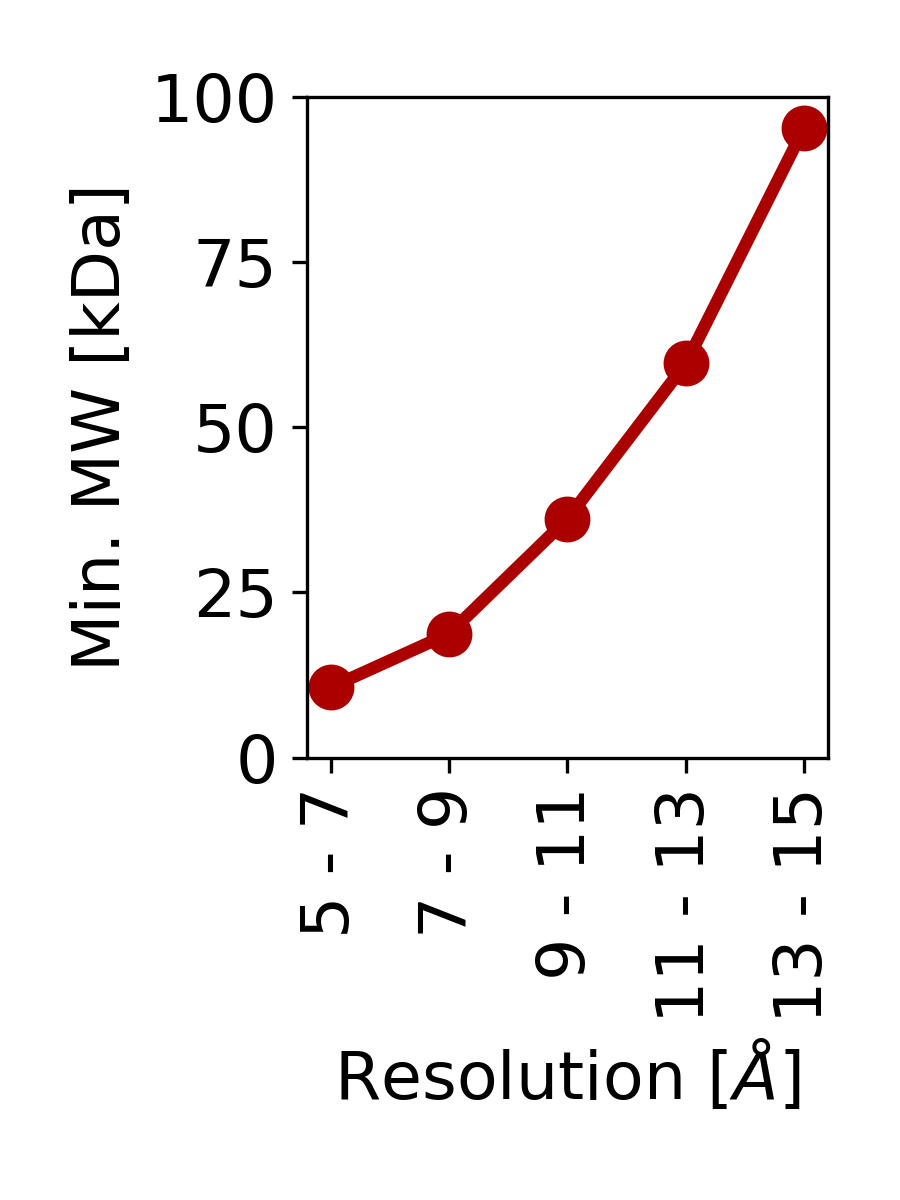
</div>

In [6]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("experimental_data/3j3u/emd_5609_processed.mrc", 10)
mad.add_subunit("experimental_data/3j3u/3j3u_subunit.pdb", 6)

mad.run(n_samples=100, cc_threshold=0.5)
mad.build_assembly()

MaD> Added: density map emd_5609_processed, resolution 10.00 A
MaD> Added: subunit experimental_data/3j3u/3j3u_subunit.pdb
MaD> Created output folder: results/emd_5609_processed_3j3u_subunitx6_res10.000_iso0.000

MaD> Processing map emd_5609_processed
MaD> Building map space for emd_5609_processed_mad...
MaD> Finding anchors in emd_5609_processed_mad... 
MaD> Orienting 1165 anchors...
MaD> Generating descriptors from 4639 oriented anchors...

MaD> Processing subunit 3j3u_subunit
MaD> Building map space for 3j3u_subunit...
MaD> Finding anchors in 3j3u_subunit... 
MaD> Orienting 235 anchors...
MaD> Generating descriptors from 862 oriented anchors...
MaD> Matching descriptors (emd_5609_processed vs. 3j3u_subunit) (cc = 0.50)...
MaD> Filtering descriptor pairs (map emd_5609_processed vs. structure 3j3u_subunit) (weight=4, n_samples=100*6)...
MaD> Refining emd_5609_processed in 3j3u_subunit...

------------------------------------------
|  # | Repeat | Weight |   mCC  |  RWmCC |
-----------

#### Kainate receptor GluK2 at 11.6 A

Do not forget to create a new MaD instance to avoid issues with previously added structures.

Here, the lower resolution means that individuals secondary elements are not distinguishable and are, instead, merged. As a result, a larger patch diameter needs to be considered in order to build reliable descriptors. As a result, a 24-voxel diameter patch (the voxel spacing at 1.324, yielding a patch of 32 A in diameter). A patch of 20 voxels (26.5 A in diameter) also yields the expected assembly, but more false positives are also highlighted.

Subunit B is also alternatively located at the positions of subunit A, but the conformational differences makes these locations score lower.

In [8]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("experimental_data/5kuh/emd_8290_processed.mrc", 11.6)
mad.add_subunit("experimental_data/5kuh/5kuh_subA.pdb", 2)
mad.add_subunit("experimental_data/5kuh/5kuh_subB.pdb", 2)

mad.run(patch_size=24)
mad.build_assembly()


MaD> Added: density map emd_8290_processed, resolution 11.60 A
MaD> Added: subunit experimental_data/5kuh/5kuh_subA.pdb
MaD> Added: subunit experimental_data/5kuh/5kuh_subB.pdb
MaD> Created output folder: results/emd_8290_processed_5kuh_subAx2.5kuh_subBx2_res11.600_iso0.000

MaD> Processing map emd_8290_processed
MaD> Building map space for emd_8290_processed_mad...
MaD> Finding anchors in emd_8290_processed_mad... 
MaD> Orienting 430 anchors...
MaD> Generating descriptors from 1395 oriented anchors...

MaD> Processing subunit 5kuh_subA
MaD> Building map space for 5kuh_subA...
MaD> Finding anchors in 5kuh_subA... 
MaD> Orienting 186 anchors...
MaD> Generating descriptors from 764 oriented anchors...

MaD> Processing subunit 5kuh_subB
MaD> Building map space for 5kuh_subB...
MaD> Finding anchors in 5kuh_subB... 
MaD> Orienting 189 anchors...
MaD> Generating descriptors from 838 oriented anchors...
MaD> Matching descriptors (emd_8290_processed vs. 5kuh_subA) (cc = 0.60)...
MaD> Filtering

#### Beta-galactosidase at 13 A

Do not forget to create a new MaD instance to avoid issues with previously added structures.

In this assembly, we have 4 copies of B-galactosidase monomers along with small Fab domains. For similar reasons as in the MecA-ClpC complex, the Fab domains cannot be docked using our method due to their small sizes (we estimate a minimum size of 90 to 100 kDa for reliable docking with a resolution of 13 A) (see figure in the section of the MecA-ClpC example).

Indeed, at these resolutions, only smaller domains may be reliably observed in a density map. This usually means that descriptors should cover a larger volume to be reliable, but not too large to go beyond the size of the subunit. In this case, the voxel spacing is at 3 A, meaning that a subvolume of 3 * 16 voxels = 48 A of diamater is considered. To reduce it to a more manageable volume with less bias, we set the patch_size to 12 voxels instead (36 A in diameter). Other sizes may work as well, but not necessarily find all the expected localizations of the B-galactosidase.

The lower resolution requires to tweak the descriptor cross-correlation threshold to 0.5 (down from 0.6 by default) and the number of descriptor pairs for clustering (100, up from 60 by default).

Regardless, the first model built is the expected model (minus Fab domains).

In [9]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("experimental_data/4ckd/emd_2548_processed.mrc", 13)
mad.add_subunit("experimental_data/4ckd/4ckd_subunit.pdb", 4)

mad.run(n_samples=120, patch_size=12)
mad.build_assembly()

MaD> Added: density map emd_2548_processed, resolution 13.00 A
MaD> Added: subunit experimental_data/4ckd/4ckd_subunit.pdb
MaD> Created output folder: results/emd_2548_processed_4ckd_subunitx4_res13.000_iso0.000

MaD> Processing map emd_2548_processed
MaD> Building map space for emd_2548_processed_mad...
MaD> Finding anchors in emd_2548_processed_mad... 
MaD> Orienting 260 anchors...
MaD> Generating descriptors from 920 oriented anchors...

MaD> Processing subunit 4ckd_subunit
MaD> Building map space for 4ckd_subunit...
MaD> Finding anchors in 4ckd_subunit... 
MaD> Orienting 86 anchors...
MaD> Generating descriptors from 379 oriented anchors...
MaD> Matching descriptors (emd_2548_processed vs. 4ckd_subunit) (cc = 0.60)...
MaD> Filtering descriptor pairs (map emd_2548_processed vs. structure 4ckd_subunit) (weight=4, n_samples=120*4)...
MaD> Refining emd_2548_processed in 4ckd_subunit...

------------------------------------------
|  # | Repeat | Weight |   mCC  |  RWmCC |
--------------

#### Simulated assemblies

This section covers a set of 21 assemblies simulated at a resolution of 10 Å.

In general, if the file given to the add_map() function is a PDB file, it will be converted to a density map at the specified resolution. The resulting map is available in the "initial_files" folder of the results folder.

In [10]:
import os
from mad import MaD

# Chose assembly in the list
##################
assembly_list = ['1cs4','1gpq','1mda','1suv','1tyq','1vcb','1z5s',
                 '2bbk','2bo9','2dqj','2gc7','2uzx','2wvy','2y7h',
                 '3lu0','3nvq','3pdu','3puv','3r5d','3sfd','3v6d']
assembly = "1cs4"
##################

# Explore folder to get files and stoichiometry
path = "../Simulated_dataset"
ref = os.path.join(path, assembly, "%s.pdb"%assembly)
components = []
for c in os.listdir(os.path.join(path, assembly)):
    if len(c) == 8:
        continue
    else:
        n_copies = int(c.split("_")[-1].split(".")[0])
        components.append([os.path.join(os.path.join(path, assembly, c)), n_copies])
for c in components:
    print("%i x %s"%(c[1], c[0]))
print()

# Build MaD instance
mad = MaD.MaD()

# Add map and components
mad.add_map(ref, 10)
for c in components:
    sub, n_copies = c
    mad.add_subunit(sub, n_copies=n_copies)

# Run docking and assembly making
# > EXCEPTION: 1mda requires a lower descriptor CC threshold for one subunit.
# > Make sure to TRANSFORM subunits away from their fitted positions.
if assembly == "1mda":
    mad.run(transform_subunits=True, cc_threshold=0.5) # rotate/translate subunits out of assembly
else:
    mad.run(transform_subunits=True) # rotate/translate subunits out of assembly
    
# Build assembly
mad.build_assembly()

1 x ../Simulated_dataset\1cs4\1cs4_A_1.pdb
1 x ../Simulated_dataset\1cs4\1cs4_B_1.pdb
1 x ../Simulated_dataset\1cs4\1cs4_C_1.pdb

MaD> Added: density map 1cs4, resolution 10.00 A
MaD> Added: subunit ../Simulated_dataset\1cs4\1cs4_A_1.pdb
MaD> Added: subunit ../Simulated_dataset\1cs4\1cs4_B_1.pdb
MaD> Added: subunit ../Simulated_dataset\1cs4\1cs4_C_1.pdb
MaD> Created output folder: results/1cs4_1cs4_A_1x1.1cs4_B_1x1.1cs4_C_1x1_res10.000_iso0.000
MaD> PDB provided for density map: ../Simulated_dataset\1cs4\1cs4.pdb
     Simulating at specified resolution and voxel spacing of 1.2 angstroms

MaD> Processing map 1cs4
MaD> Building map space for 1cs4_simulated_map...
MaD> Finding anchors in 1cs4_simulated_map... 
MaD> Orienting 277 anchors...
MaD> Generating descriptors from 1049 oriented anchors...

MaD> Processing subunit 1cs4_A_1
MaD> Building map space for 1cs4_A_1...
MaD> Finding anchors in 1cs4_A_1... 
MaD> Orienting 77 anchors...
MaD> Generating descriptors from 296 oriented anchors..

# 3. Ensemble docking with GroEL

Here, we show how to process a structural ensemble with an example from GroEL.

This ensemble was generated using molecular dynamics, and reduced to a set of unique structures using our clustering software CLoNe (see our lab's website and GitHub page).

An ensemble is passed just like any other structure. Instead of specifying a filename, specify the folder that contains the PDB files (make sure only the required PDB files are in the folder, without other files, to make sure everything runs smoothly).

In this particular case, it is advised not to build an assembly. GroEL has 14 copies of its subunit, and exploring combinations is going to take a very long time. Instead, use the score_ensembles() function to highlight the best candidates.

Then, you can rerun MaD on the best candidate alone and build the assembly.

MaD> Added: density map EMD-5338_denoised, resolution 7.00 A
      > Added frame:  GroEL_CLoNeCenters_0
      > Added frame:  GroEL_CLoNeCenters_1
      > Added frame:  GroEL_CLoNeCenters_2
      > Added frame:  GroEL_CLoNeCenters_3
      > Added frame:  GroEL_CLoNeCenters_4
      > Added frame:  GroEL_CLoNeCenters_5
      > Added frame:  GroEL_CLoNeCenters_6
MaD> Added: ensemble CLoNe_ensemble of 6 frames
MaD> Created output folder: results/EMD-5338_denoised_CLoNe_ensemblex14_res7.000_iso0.000

MaD> Processing map EMD-5338_denoised
MaD> Building map space for EMD-5338_denoised_mad...
MaD> Finding anchors in EMD-5338_denoised_mad... 
MaD> Orienting 2699 anchors...
MaD> Generating descriptors from 14013 oriented anchors...

MaD> Describing ensemble CLoNe_ensemble
MaD> Describing CLoNe_ensemble-GroEL_CLoNeCenters_0
MaD> Building map space for GroEL_CLoNeCenters_0...
MaD> Finding anchors in GroEL_CLoNeCenters_0... 
MaD> Orienting 290 anchors...
MaD> Generating descriptors from 1378 orient

MaD> Filtering descriptor pairs (map EMD-5338_denoised vs. structure GroEL_CLoNeCenters_4) (weight=4, n_samples=60*14)...
MaD> Refining EMD-5338_denoised in GroEL_CLoNeCenters_4...

------------------------------------------
|  # | Repeat | Weight |   mCC  |  RWmCC |
------------------------------------------
|  0 |  21.93 |     95 |   0.45 | 942.23 |
|  1 |  20.18 |     84 |   0.46 | 782.32 |
|  2 |  21.93 |     77 |   0.46 | 770.82 |
|  3 |  18.42 |     87 |   0.46 | 732.44 |
|  4 |  21.05 |     74 |   0.44 | 685.33 |
|  5 |  19.74 |     57 |   0.46 | 519.73 |
|  6 |  18.42 |     53 |   0.44 | 432.10 |
|  7 |  19.30 |     49 |   0.46 | 432.01 |
|  8 |  19.74 |     46 |   0.46 | 418.72 |
|  9 |  18.42 |     49 |   0.45 | 404.10 |
| 10 |  17.98 |     45 |   0.46 | 373.87 |
| 11 |  19.30 |     38 |   0.45 | 327.16 |
| 12 |  18.86 |     35 |   0.43 | 285.55 |
| 13 |  17.54 |     36 |   0.45 | 283.51 |
------------------------------------------

MaD> Matching descriptors (EMD-5338_denoise

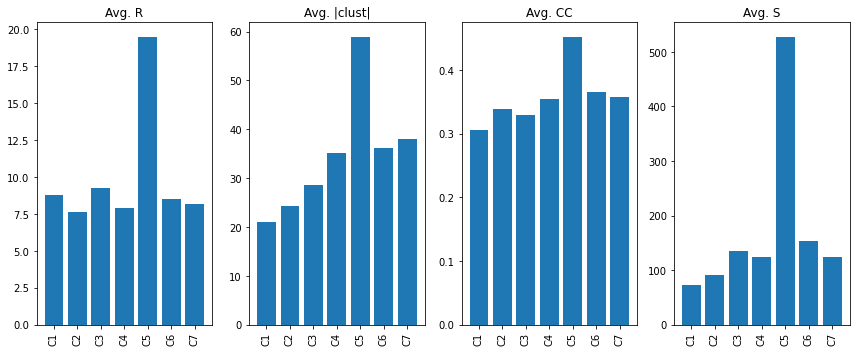

In [1]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("experimental_data/GroEL/EMD-5338_denoised.mrc", 7)
mad.add_subunit("experimental_data/GroEL/CLoNe_ensemble/", n_copies=14)

mad.run()
mad.score_ensembles()

MaD> Ranking for ensemble CLoNe_ensemble: 
     Top 3 - Repeatability:
     1:  19.49 GroEL_CLoNeCenters_4
     2:   9.23 GroEL_CLoNeCenters_2
     3:   8.77 GroEL_CLoNeCenters_0

     Top 3 - Weight:
     1:  58.93 GroEL_CLoNeCenters_4
     2:  38.00 GroEL_CLoNeCenters_6
     3:  36.11 GroEL_CLoNeCenters_5

     Top 3 - Cross-corr.:
     1:   0.45 GroEL_CLoNeCenters_4
     2:   0.37 GroEL_CLoNeCenters_5
     3:   0.36 GroEL_CLoNeCenters_6

     Top 3 - MaD score:
     1: 527.85 GroEL_CLoNeCenters_4
     2: 153.52 GroEL_CLoNeCenters_5
     3: 134.83 GroEL_CLoNeCenters_2


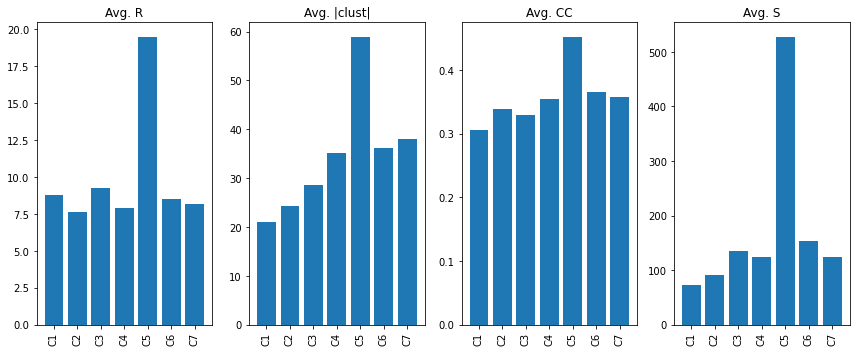

In [2]:
# Showing the plots again in case they were lost in the output of the previous cell
mad.score_ensembles()

The plot above report:

* R is the repeatability or percentage of corresponding anchors between component and cryo-EM map
* |clust| the size of the clusters (i.e. the number of descriptor pairs agreeing with a localization)
* CC the cross-correlation with the experimental cryo-EM data 
* S the merged score from their product


From the above plots, it is clear that GroEL_CLoNeCenters_4 is the best conformational fit with the cryo-EM data. 


Let's build an assembly from that structure. The descriptors have been computed for both the map and the structure, making this relatively faster.

In [3]:
from mad import MaD
mad = MaD.MaD()

mad.add_map("experimental_data/GroEL/EMD-5338_denoised.mrc", 7)
mad.add_subunit("experimental_data/GroEL/CLoNe_ensemble/GroEL_CLoNeCenters_4.pdb", n_copies=14)

mad.run()
mad.build_assembly()

MaD> Added: density map EMD-5338_denoised, resolution 7.00 A
MaD> Added: subunit experimental_data/GroEL/CLoNe_ensemble/GroEL_CLoNeCenters_4.pdb
MaD> Created output folder: results/EMD-5338_denoised_GroEL_CLoNeCenters_4x14_res7.000_iso0.000
MaD> 14013 descriptors for EMD-5338_denoised found in database
MaD> 1594 descriptors for GroEL_CLoNeCenters_4 found in database
MaD> Matching descriptors (EMD-5338_denoised vs. GroEL_CLoNeCenters_4) (cc = 0.60)...
MaD> Filtering descriptor pairs (map EMD-5338_denoised vs. structure GroEL_CLoNeCenters_4) (weight=4, n_samples=60*14)...
MaD> Refining EMD-5338_denoised in GroEL_CLoNeCenters_4...

------------------------------------------
|  # | Repeat | Weight |   mCC  |  RWmCC |
------------------------------------------
|  0 |  21.93 |     95 |   0.45 | 942.23 |
|  1 |  20.18 |     84 |   0.46 | 782.32 |
|  2 |  21.93 |     77 |   0.46 | 770.82 |
|  3 |  18.42 |     87 |   0.46 | 732.44 |
|  4 |  21.05 |     74 |   0.44 | 685.33 |
|  5 |  19.74 |    

GroEL has 14 subunits, all highlighted and accounted for by using the highlighted frame in the structural ensemble.

In such a situation, the assembly process is thus as easy as it gets.

# 4. Anchor files

Within "results/your_system_results/individual_solutions", you will find a folder named "anchor_files". This folder contains the information about the anchors and descriptors that were generated during the docking procedure.

* Filenames in the form: "anchor_cor_COMPONENT_NAME_SOLUTION_IDX.bld":
    * To be visualized in ChimeraX. These files contain the correspondences between the component COMPONENT_NAME and map anchors that yielded the solution of index SOLUTION_IDX. Better visualized with the files described in the next bullet point.
* Filenames in the form: "anchor_HI/LO_COMPONENT_NAME_SOLUTION_IDX.pdb":
    * These PDB files contain the coordinates of the anchors that generated valid descriptors for a given component and solution. "hi" refers to the anchors of the component; "lo" refers to those of the cryo-EM map.
* Filenames in the form: "anchor_ori_HI/LO_COMPONENT_NAME_SOLUTION_IDX.bld":
    * To be visualized in ChimeraX. These files contain the dominant orientation (only the first one) of the anchors that generated valid descriptors.
* Filenames in the form of "corresp_anchors_COMPONENT_NAME_SOLUTION_IDX.pdb":
    * These PDB files contain the coordinates of the corresponding anchors between COMPONENT_NAME and the cryo-EM data for a specific solution. These anchors may not have generated valid descriptors but their location was still useful during the global matching step.